In [126]:
#import packages
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
import statistics
%matplotlib inline

In [121]:
#splitting data into features and class labels
spine_data = pd.read_csv("./Dataset_spine.csv")
data = spine_data.iloc[:,:13]
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

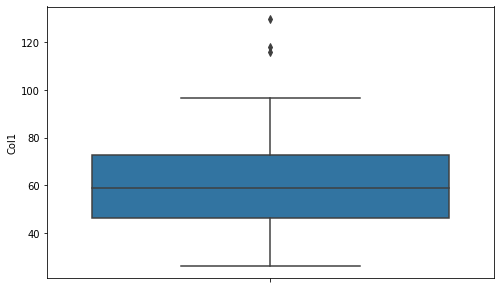

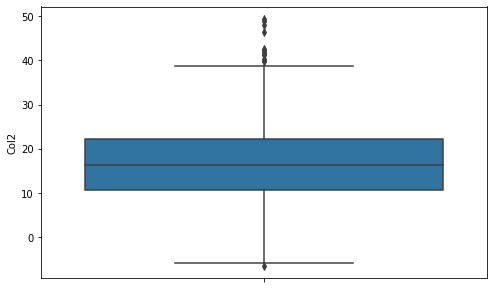

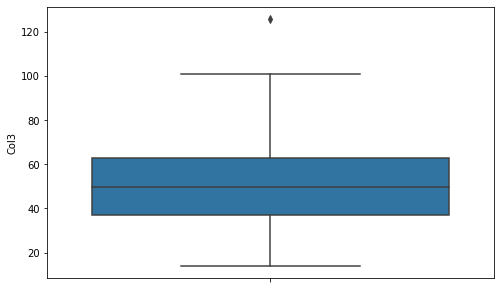

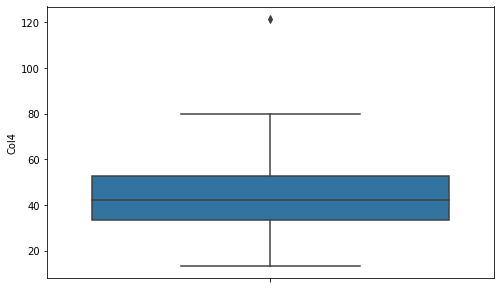

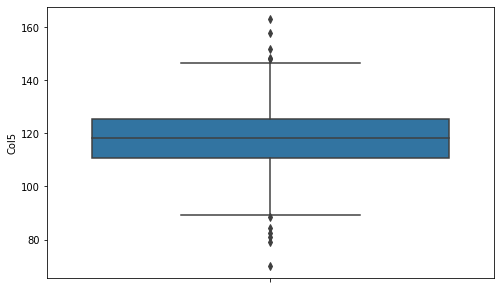

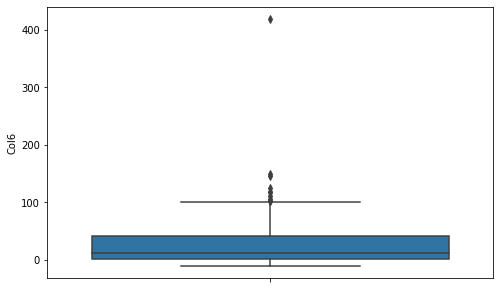

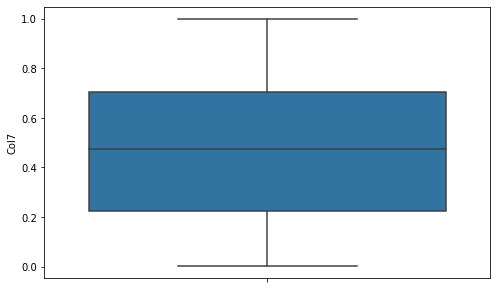

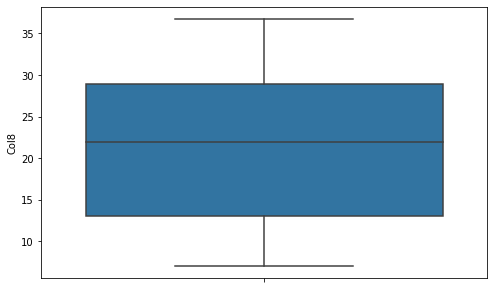

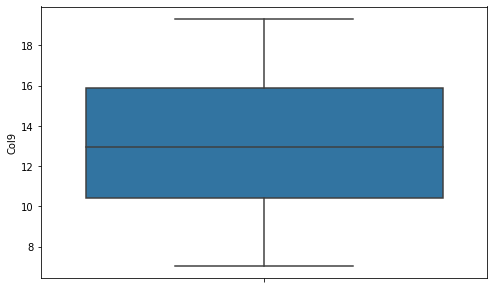

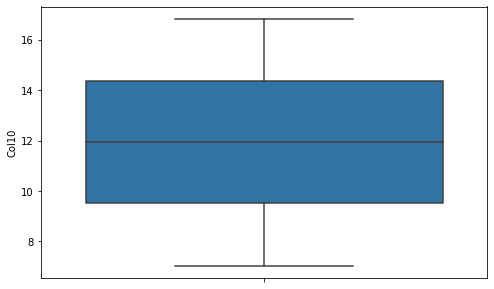

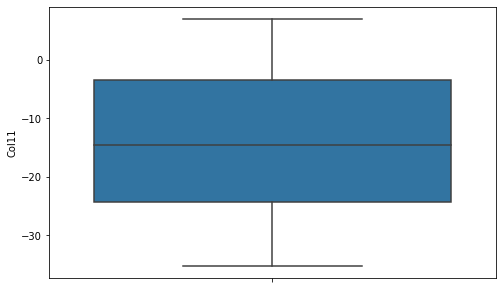

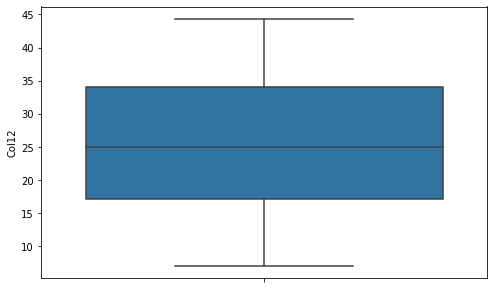

In [3]:
#section 2.1.2
#univariate outlier detection using boxplot for individual features
plt.rcParams['figure.figsize'] = [8, 5]
for i in range(0,len(X.iloc[1])):
    sns.boxplot(y = X.iloc[:,i])
    plt.show()

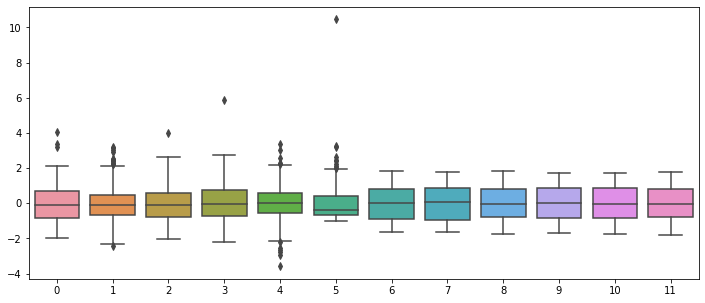

In [122]:
#section 2.1.1 and section 2.1.2
#univariate outlier detection using boxplot for all features

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
sns.boxplot(data = pd.DataFrame(X))
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

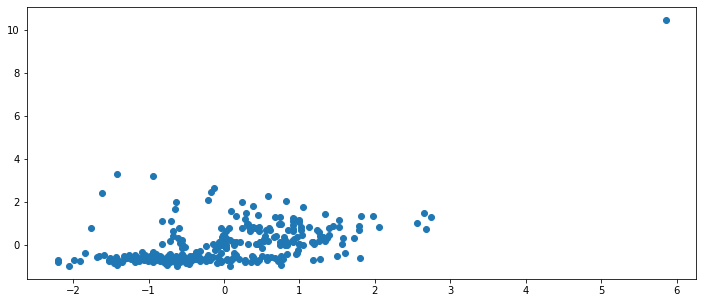

Counter({0: 309, -1: 1}) 



In [5]:
#section 2.1.2
plt.scatter(X[:,3], X[:,5])
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()
DB = DBSCAN(eps=5, min_samples = 3)
DB.fit(X)
print (Counter(DB.labels_), '\n')

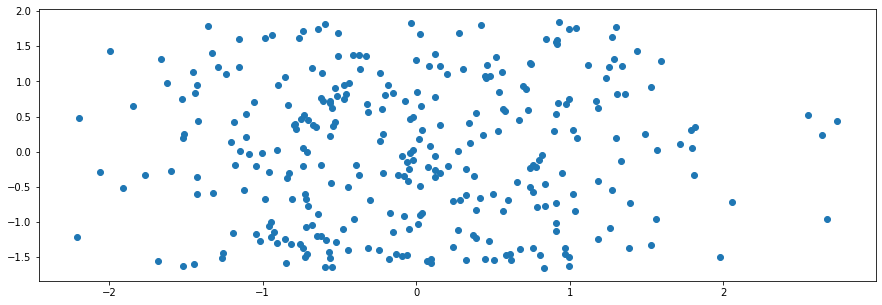

In [6]:
#section 2.1.2
#removing the outlier
X = X[DB.labels_ !=-1]
y = y[DB.labels_ !=-1]
plt.scatter(X[:,3], X[:,6])
plt.show()

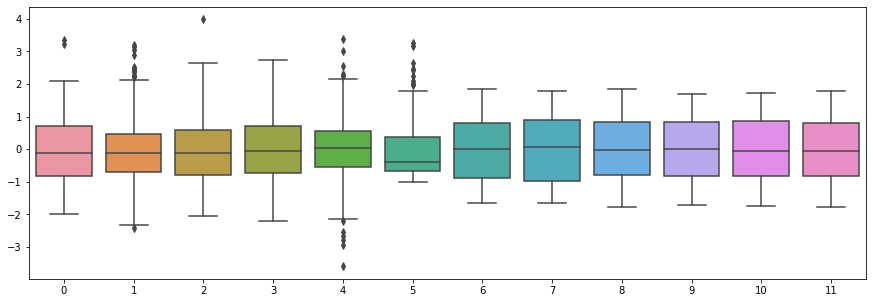

In [7]:
#section 2.1.2
#after removal of outliers
sns.boxplot(data = pd.DataFrame(X))
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

In [8]:
X = pd.DataFrame(X)
print(len(X))
print(type(y))

309
<class 'pandas.core.series.Series'>


In [9]:
#section 2.1.3
#checking if there are missing values
print(X.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64


In [123]:
X= np.array(X)
y = np.array(y)

In [12]:
#section 2.1.4
#accuracy before feature selection
decTree = DecisionTreeClassifier()
scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Result before feature selection: ',scores.mean())

Result before feature selection:  0.7546236559139785


In [13]:
#section 2.1.4
#feature selection
estimator = linear_model.LogisticRegression(multi_class='auto', solver ='lbfgs')
rfecv = RFECV(estimator, cv=10)
rfecv.fit(X, y)
# optimal number of features
print (rfecv.n_features_)
# ranking of each feature
print (rfecv.ranking_)
print(X)

4
[2 1 3 1 1 1 9 7 5 4 8 6]
[[ 0.14708636  0.50136873 -0.6651769  ...  1.1671291  -1.19658726
   1.71236843]
 [-1.24586434 -0.74876898 -1.45300075 ...  1.67955123 -0.94032533
  -0.91394145]
 [ 0.4843695   0.46793218 -0.09926175 ...  1.63596949 -1.22717809
  -0.61568643]
 ...
 [ 0.05520137  0.51561812 -0.31097748 ... -1.05158278  1.44337397
  -0.69303204]
 [-0.88582307 -0.88565951 -0.55861259 ... -0.75264852  1.62384854
   0.77376463]
 [-1.54892681 -1.24785954 -0.82539423 ...  0.62174631  1.29742294
   1.43371339]]


In [14]:
#section 2.1.4
#accuracy after feature selection
X = X[ : , rfecv.support_ ]
decTree = DecisionTreeClassifier()
scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Result after feature selection: ',scores.mean())

Result after feature selection:  0.7835483870967742


In [26]:
#section 2.1.5
#checking if data is imbalanced
targets = pd.DataFrame(y)
parts = targets.iloc[:,0].value_counts()
print ("Minority class represents just ",(parts[1]/len(y))*100, " % of the dataset")

Minority class represents just  32.362459546925564  % of the dataset


In [99]:
#section 2.2
models = [RidgeClassifier(),LinearSVC(random_state=10, max_iter=2000), GaussianNB(),
          KNeighborsClassifier(n_neighbors=3),BernoulliNB(),DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=50, random_state=1),
          MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]

In [118]:
#section 2.2
accuracies = {}
for i in models:    
    totalConfusionMatrix = np.zeros((2,2))
    i_totalConfusionMatrix = np.zeros((2,2))
    i_accuracy_total = 0
    accuracy_total = 0
    kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
    for train_index, test_index in kf.split(X,y):
        
        #create model without balancing data
        clf = i
        clf.fit(X[train_index], y[train_index])
        
        #test the model to check confusion matrix
        results= clf.predict( X[test_index] )
        confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
        i_totalConfusionMatrix += confusionMatrix
        
        #model's accuracy
        accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
        i_accuracy_total += accuracy

        # rebalance the training data for this split of cross fold
        sm = SMOTE(random_state=0)
        X_train, y_train = sm.fit_sample(X[train_index], y[train_index])
    

        # create out ML Model and train on the rebalanced data
        clf = i
        clf.fit(X_train, y_train)

        # test the model on the test set 
        results= clf.predict( X[test_index] )
        confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
        totalConfusionMatrix += confusionMatrix
        
        #model's accuracy
        accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
        accuracy_total += accuracy
    
    accuracies[str(i)[:str(i).find('(')]] = accuracy_total/len(y)*100
    print("Model : ",str(i)[:str(i).find('(')])
    print("Before balancing : ")
    print("Confusion Matrix : \n", i_totalConfusionMatrix)
    print("Accuracy : ",i_accuracy_total/len(y)*100, "%\n")
    print("After balancing : ")
    print("Confusion Matrix : \n", totalConfusionMatrix)
    print("Accuracy : ",accuracy_total/len(y)*100, "%")
    print("\n") 
    

Model :  RidgeClassifier
Before balancing : 
Confusion Matrix : 
 [[190.  19.]
 [ 25.  75.]]
Accuracy :  85.76051779935275 %

After balancing : 
Confusion Matrix : 
 [[155.  54.]
 [  4.  96.]]
Accuracy :  81.22977346278317 %


Model :  LinearSVC
Before balancing : 
Confusion Matrix : 
 [[183.  26.]
 [ 19.  81.]]
Accuracy :  85.43689320388349 %

After balancing : 
Confusion Matrix : 
 [[170.  39.]
 [ 12.  88.]]
Accuracy :  83.49514563106796 %


Model :  GaussianNB
Before balancing : 
Confusion Matrix : 
 [[158.  51.]
 [ 12.  88.]]
Accuracy :  79.6116504854369 %

After balancing : 
Confusion Matrix : 
 [[154.  55.]
 [ 11.  89.]]
Accuracy :  78.64077669902912 %


Model :  KNeighborsClassifier
Before balancing : 
Confusion Matrix : 
 [[173.  36.]
 [ 21.  79.]]
Accuracy :  81.55339805825243 %

After balancing : 
Confusion Matrix : 
 [[161.  48.]
 [ 16.  84.]]
Accuracy :  79.28802588996764 %


Model :  BernoulliNB
Before balancing : 
Confusion Matrix : 
 [[155.  54.]
 [ 19.  81.]]
Accuracy :

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

Model :  MLPClassifier
Before balancing : 
Confusion Matrix : 
 [[186.  23.]
 [ 25.  75.]]
Accuracy :  84.46601941747572 %

After balancing : 
Confusion Matrix : 
 [[171.  38.]
 [ 14.  86.]]
Accuracy :  83.1715210355987 %




/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'RidgeClassifier': 81.22977346278317, 'LinearSVC': 83.49514563106796, 'GaussianNB': 78.64077669902912, 'KNeighborsClassifier': 79.28802588996764, 'BernoulliNB': 76.37540453074433, 'DecisionTreeClassifier': 81.22977346278317, 'RandomForestClassifier': 83.1715210355987, 'MLPClassifier': 83.1715210355987}


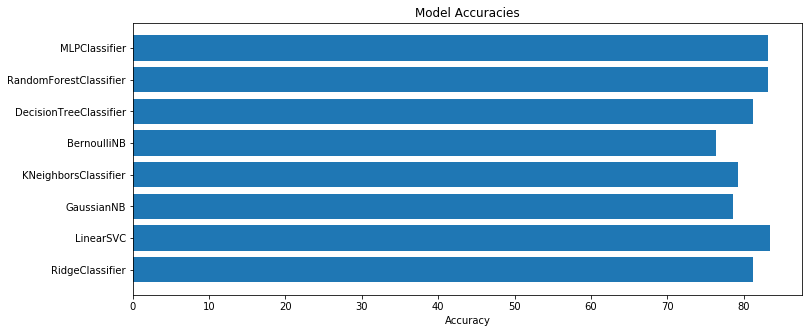

In [119]:
#section 1.2
print(accuracies)
plt.barh(np.arange(len(accuracies.keys())),accuracies.values(), align='center', alpha=1)
plt.yticks(np.arange(len(accuracies.keys())), accuracies.keys())
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

In [30]:
#top 3 : LinearSVC, RandomForestClassifier, MLPClassifier

In [34]:
#section 1.3
#gridsearchcv to do hyperparameter tuning
top_3_models = [LinearSVC(random_state=10),RandomForestClassifier(random_state=10),MLPClassifier(random_state=10)]
for i in top_3_models :
    # The random forest will be the classifier that is part of the pipeline
    classification_model = i

    # We are going to use SMOTE resampling as part of the pipeline
    sm = SMOTE(random_state=10)

    # Create a search grid for the random forest
    param_grid_linear_SVC = [ {'model__penalty': ["l1", "l2"],  'model__loss':["hinge", "squared_hinge"],    
                               'model__verbose': [0,1,-1],  'model__max_iter' : [1000,2000]  }  ]
    param_grid_random_forest = [ { 'model__n_estimators' : [20,50,100],  'model__criterion':["gini","entropy"], 
                                  'model__max_depth': [None,10], 'model__min_samples_split': [2,4,6], 
                                  'model__min_samples_leaf': [1,2,3], 'model__max_features': ["auto",None,"log2","sqrt"]}]
    param_grid_mlp = [ { 'model__hidden_layer_sizes':[(10,2),(20,2),(100,2)], 
                        'model__activation':["identity", "logistic", "tanh", "relu"],
                       'model__solver':["lbfgs", "sgd", "adam"], 'model__alpha':[1e-5,1e-4,1e-3],
                       'model__learning_rate':["constant", "invscaling", "adaptive"], 'model__max_iter':[1000,2000]}]

    # Create an imbalanced learn pipeline. The pipeline just consists of SMOTE and
    # a random forst classifier. Smote will only be applied to the training set during
    # each iteration of cross fold validation (not the test data)
    pipeline = Pipeline( [('smt', sm), ('model', classification_model)] )

    # Create a normal instnace of grid search CV and pass it the pipeline object
    if str(classification_model) == str(LinearSVC(random_state=10)):
        clf = GridSearchCV(pipeline, param_grid_linear_SVC, cv=10)
        clf.fit(X, y)
        
    elif str(classification_model) == str(RandomForestClassifier(random_state=10)):
        clf = GridSearchCV(pipeline, param_grid_random_forest, cv=10)
        clf.fit(X, y)
        
    elif str(classification_model) == str(MLPClassifier(random_state=10)):
        clf = GridSearchCV(pipeline, param_grid_mlp, cv=10)
        clf.fit(X, y)
    print(i)
    print(clf.best_params_ , "with a score of ", clf.best_score_)
    
    

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validati

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/model_selection/_validati

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
          verbose=0)
{'model__loss': 'squared_hinge', 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__verbose': 0} with a score of  0.8225806451612904
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_le

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergence

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lenov

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lenovo/anaconda3/envs/ai_conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (20, 2), 'model__learning_rate': 'constant', 'model__max_iter': 2000, 'model__solver': 'lbfgs'} with a score of  0.8320430107526882


In [115]:
#section 3
#research topic
#checking if data is imbalanced
targets = pd.DataFrame(y)
parts = targets.iloc[:,0].value_counts()
print ("Minority class represents just ",(parts[1]/len(y))*100, " % of the dataset")

Minority class represents just  32.362459546925564  % of the dataset


In [128]:
#section 3
#research -sampling of imbalanced data
acc_overall = {}
spec_overall = {}
gm_overall = {}
#Voting ensemble classifier without balancing data
clf1 = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
          verbose=0)
clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)
clf3 = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,2),learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
spec = []
gm = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    #create model without balancing data
    clf.fit(X[train_index], y[train_index])

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))
    
print("No Balancing")        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score :",statistics.mean(spec))
print("Geometric Mean Score :",statistics.mean(gm))
acc_overall["No Balancing"] = accuracy_total/len(y)*100
spec_overall["No Balancing"] = statistics.mean(spec)
gm_overall["No Balancing"] = statistics.mean(gm)

No Balancing
Confusion Matrix :
  [[185.  25.]
 [ 28.  72.]]
Accuracy :  82.9032258064516
Specificity Score : 0.7719201228878648
Geometric Mean Score : 0.7992882527046866


In [134]:
#section 3
#random under-sampling using stratified k-fold
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
spec = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    
    #undersampling
    rus = RandomUnderSampler(random_state=10)
    X_train,y_train = rus.fit_resample(X[train_index], y[train_index])
    
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))

print("Random under-sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["RUS"] = accuracy_total/len(y)*100
spec_overall["RUS"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["RUS"] = statistics.mean(gm)

Random under-sampling
Train data length before sampling 279
Train data length after sampling 180
Confusion Matrix :
  [[170.  40.]
 [ 14.  86.]]
Accuracy :  82.58064516129032
Specificity Score: 0.8437173579109063
Geometric Mean Score : 0.8169187172644167


In [135]:

#section 3
#random over-sampling
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
spec = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    
    #oversampling
    ros = RandomOverSampler(random_state=10)
    X_train,y_train = ros.fit_resample(X[train_index], y[train_index])
    
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))

print("Random over-sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["ROS"] = accuracy_total/len(y)*100
spec_overall["ROS"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["ROS"] = statistics.mean(gm)

Random over-sampling
Train data length before sampling 279
Train data length after sampling 378
Confusion Matrix :
  [[179.  31.]
 [ 17.  83.]]
Accuracy :  84.51612903225806
Specificity Score: 0.8372196620583717
Geometric Mean Score : 0.8249226864408699


In [136]:
#section 3
#sampling using SMOTE oversampling technique
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
sepc = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    #sampling using SMOTE
    sm = SMOTE(random_state=0)
    X_train, y_train = sm.fit_sample(X[train_index], y[train_index])
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))


print("SMOTE sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["SMOTE"] = accuracy_total/len(y)*100
spec_overall["SMOTE"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["SMOTE"] = statistics.mean(gm)

SMOTE sampling
Train data length before sampling 279
Train data length after sampling 378
Confusion Matrix :
  [[177.  33.]
 [ 22.  78.]]
Accuracy :  82.25806451612904
Specificity Score: 0.8187480798771122
Geometric Mean Score : 0.8214006270796592


In [137]:
#section 3
#TOMEK undersampling technique
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
spec = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    #sampling using TOMEK
    tl = TomekLinks()
    X_train, y_train = tl.fit_resample(X[train_index], y[train_index])
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))


print("TOMEK sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["TOMEK"] = accuracy_total/len(y)*100
spec_overall["TOMEK"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["TOMEK"] = statistics.mean(gm)

TOMEK sampling
Train data length before sampling 279
Train data length after sampling 261
Confusion Matrix :
  [[184.  26.]
 [ 22.  78.]]
Accuracy :  84.51612903225806
Specificity Score: 0.8110291858678955
Geometric Mean Score : 0.8226588317587571


In [138]:
#section 3
#combination of SMOTE and TOMEK
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
sepc = []
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    #sampling using SMOTE and TOMEK
    smt = SMOTETomek(random_state=10)
    X_train, y_train = smt.fit_resample(X[train_index], y[train_index])
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))

print("SMOTE_TOMEK sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["SMOTE_TOMEK"] = accuracy_total/len(y)*100
spec_overall["SMOTE_TOMEK"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["SMOTE_TOMEK"] = statistics.mean(gm)

SMOTE_TOMEK sampling
Train data length before sampling 279
Train data length after sampling 368
Confusion Matrix :
  [[177.  33.]
 [ 18.  82.]]
Accuracy :  83.54838709677419
Specificity Score: 0.8192012288786482
Geometric Mean Score : 0.8240676365973053


In [139]:
#section 3
#combination of SMOTE and ENN(Edited Nearest Neighbours)
clf= VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
totalConfusionMatrix = np.zeros((2,2))
accuracy_total = 0
spec =[]
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
for train_index, test_index in kf.split(X,y):
    
    #sampling using SMOTE and ENN
    sme = SMOTEENN(random_state=10)
    X_train, y_train = sme.fit_resample(X[train_index], y[train_index])
    
    #create model without balancing data
    clf.fit(X_train, y_train)

    #test the model to check confusion matrix
    results= clf.predict( X[test_index] )
    confusionMatrix = metrics.confusion_matrix(y_true = y[test_index], y_pred =results )
    totalConfusionMatrix += confusionMatrix

    #model's accuracy
    accuracy = accuracy_score(y_true = y[test_index], y_pred = results, normalize=False)
    accuracy_total += accuracy
    
    #model's specificity score
    spec.append(specificity_score(y_true = y[test_index], y_pred = results, average='weighted'))
    gm.append(geometric_mean_score(y_true = y[test_index], y_pred = results, average='weighted'))

print("SMOTE_ENN sampling")
print("Train data length before sampling",len(train_index))
print("Train data length after sampling",len(X_train))        
print("Confusion Matrix :\n ",totalConfusionMatrix)
print("Accuracy : ",accuracy_total/len(y)*100)
print("Specificity Score:", statistics.mean(spec))
acc_overall["SMOTE_ENN"] = accuracy_total/len(y)*100
spec_overall["SMOTE_ENN"] = statistics.mean(spec)
print("Geometric Mean Score :",statistics.mean(gm))
gm_overall["SMOTE_ENN"] = statistics.mean(gm)

SMOTE_ENN sampling
Train data length before sampling 279
Train data length after sampling 230
Confusion Matrix :
  [[145.  65.]
 [  7.  93.]]
Accuracy :  76.77419354838709
Specificity Score: 0.8527342549923195
Geometric Mean Score : 0.8218848868888523


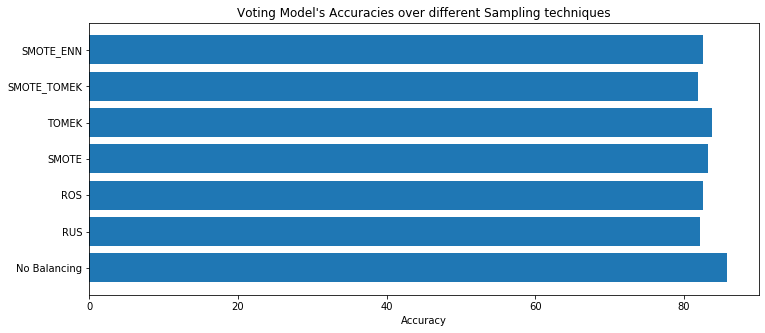

In [113]:
#section 3
plt.barh(np.arange(len(acc_overall.keys())),acc_overall.values(), align='center', alpha=1)
plt.yticks(np.arange(len(acc_overall.keys())), acc_overall.keys())
plt.xlabel('Accuracy')
plt.title("Voting Model's Accuracies over different Sampling techniques")
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

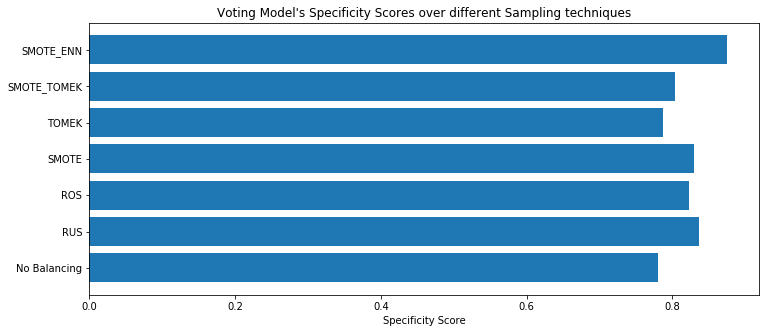

In [114]:
#section 3
plt.barh(np.arange(len(spec_overall.keys())),spec_overall.values(), align='center', alpha=1)
plt.yticks(np.arange(len(spec_overall.keys())), spec_overall.keys())
plt.xlabel('Specificity Score')
plt.title("Voting Model's Specificity Scores over different Sampling techniques")
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

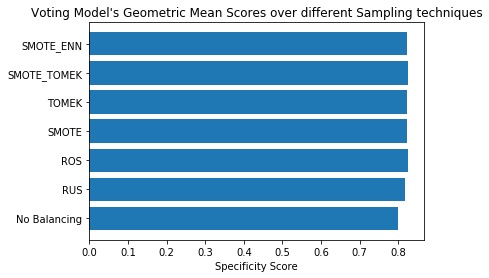

In [140]:
#section 3
plt.barh(np.arange(len(gm_overall.keys())),gm_overall.values(), align='center', alpha=1)
plt.yticks(np.arange(len(gm_overall.keys())), gm_overall.keys())
plt.xlabel('Specificity Score')
plt.title("Voting Model's Geometric Mean Scores over different Sampling techniques")
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

References:
1. https://scikit-learn.org/stable/index.html
2. Lectures notes by Dr. Ted Scully